In [1]:
# All necessary imports here
import keras
from keras.datasets import imdb
from keras import models, layers,optimizers
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


### IMDB dataset already comes packaged and pre-processed with Keras, consisting of 50,000 movie reviews in total, out of which 25,000 are for training and remaining 25,000 are for testing. For clarity, we're keeping only 10,000 most frequently occurring words in the training data.

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 2s 0us/step


In [3]:
print("Training data entries: {}, Training data labels: {}" .format(len(train_data), len(train_labels)))
print("Testing data entries: {}, Testing data labels: {}" .format(len(test_data), len(test_labels)))                           

Training data entries: 25000, Training data labels: 25000
Testing data entries: 25000, Testing data labels: 25000


### train_data and test_data consist of list of reviews where each review is a list of encoded sequence of words while train_labels and test_labels consist of list of associated labels. Each label is categorized into either "0" for negative or "1" for positive review.

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

### And for decoding the reviews back into words:

In [6]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Now, for the data to be fed into the neural network, it's necessary to turn the list of reviews as integers into tensors. This can be achieved through vectorization by using the 'one-hot encoding' technique (here implemented manually although can be directly used by importing the to_categorical class)








In [0]:
def vectorize_sequences(sequences, dimension=10000):
    # Creating an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # Now, setting specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [9]:
# The vectorizated sequences can be visualized as
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
# Vectorizing labels
# float32 is the default datatype for tensors
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Finally, reached the part to check out the experimentations as suggested in the 'Deep Learning with Python' textbook!
### Creating the model for our Network using 3 hidden layers, previously we had followed the 2 hidden layers approach.

In [11]:
model = models.Sequential()
model.add(layers.Dense(32, activation = 'tanh', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'tanh'))
model.add(layers.Dense(1, activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


###  Compiling the model, using binary crossentropy loss function and rmsprop optimizer.


In [0]:
model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 3s 207us/step - loss: 0.4584 - acc: 0.7980 - val_loss: 0.3242 - val_acc: 0.8792
Epoch 2/10
15000/15000 [==============================] - 2s 151us/step - loss: 0.2542 - acc: 0.9073 - val_loss: 0.2743 - val_acc: 0.8907
Epoch 3/10
15000/15000 [==============================] - 2s 151us/step - loss: 0.1732 - acc: 0.9385 - val_loss: 0.3110 - val_acc: 0.8761
Epoch 4/10
15000/15000 [==============================] - 2s 152us/step - loss: 0.1394 - acc: 0.9501 - val_loss: 0.3075 - val_acc: 0.8812
Epoch 5/10
15000/15000 [==============================] - 2s 144us/step - loss: 0.1080 - acc: 0.9613 - val_loss: 0.3303 - val_acc: 0.8807
Epoch 6/10
15000/15000 [==============================] - 2s 144us/step - loss: 0.0787 - acc: 0.9738 - val_loss: 0.4594 - val_acc: 0.8559
Epoch 7/10
15000/15000 [==============================] - 2s 144us/step - 

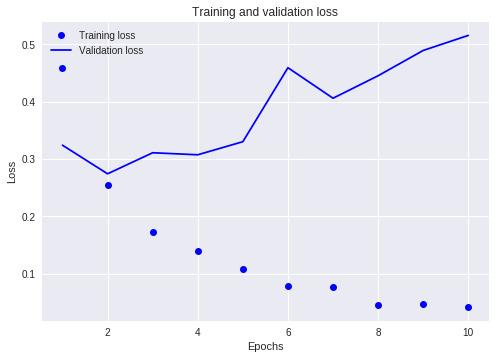

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plotting graph for training accuracy versus validation accuracy
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [16]:
# the call to model.fit() returns a History object. This object has a member history, which is a dictionary containing data about 
# everything that happened during training
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

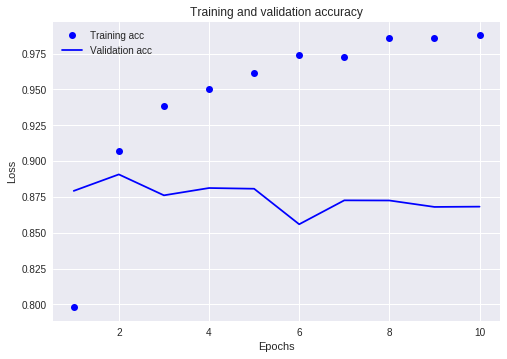

In [17]:
# Plotting graph for training accuracy versus validation accuracy

plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Plots make it visible that this model is suffering from the 'Overfitting' so it's better to train our model from scratch for 3 epochs and afterwards evaluating it on our test data


In [18]:
model = models.Sequential()
model.add(layers.Dense(32, activation = 'tanh', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'tanh'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)



Epoch 1/3
25000/25000 [==============================] - 3s 113us/step - loss: 0.4090 - acc: 0.8258
Epoch 2/3
25000/25000 [==============================] - 3s 107us/step - loss: 0.2229 - acc: 0.9172
Epoch 3/3
25000/25000 [==============================] - 2s 94us/step


In [0]:
test_loss, test_acc = results

### We've achieved 88% test accuracy after these few experimentations with hyper-parameters! This result can be improved more as we get to know more advanced insights and techniques.

In [25]:
print("Test loss: {}" .format(test_loss*100))
print("Test accuracy: {}" .format(test_acc*100))

Test loss: 29.747847267627712
Test accuracy: 88.14800000000001
